In [35]:
#load the data into a dataframe and rename the columns
import pandas as pd

new_cols = ['State',
            'Median Household Income',
            'Share Of Seasonal Unemployed Population',
            'Share of Population in Metro Areas',
            'Share of Population With High School Degree',
            'Share of Non-Citizens',
            'Share of White Poverty',
            'Gini Index',
            'Share of Non-White',
            'Share of Voters Who Voted for Trump (2016)',
            'Hate Crimes Per 100K (SPLC)',
            'Average Hate Crimes Per 100K (FBI)']
hate_crimes = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/hate-crimes/hate_crimes.csv", names=new_cols, header=0)
hate_crimes.head()

,State,Median Household Income,Share Of Seasonal Unemployed Population,Share of Population in Metro Areas,Share of Population With High School Degree,Share of Non-Citizens,Share of White Poverty,Gini Index,Share of Non-White,Share of Voters Who Voted for Trump (2016),Hate Crimes Per 100K (SPLC),Average Hate Crimes Per 100K (FBI)
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [2]:
#see information about the
hate_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        51 non-null     object 
 1   Median Household Income                      51 non-null     int64  
 2   Share Of Seasonal Unemployed Population      51 non-null     float64
 3   Share of Population in Metro Areas           51 non-null     float64
 4   Share of Population With High School Degree  51 non-null     float64
 5   Share of Non-Citizens                        48 non-null     float64
 6   Share of White Poverty                       51 non-null     float64
 7   Gini Index                                   51 non-null     float64
 8   Share of Non-White                           51 non-null     float64
 9   Share of Voters Who Voted for Trump (2016)   51 non-null     float64
 10  Hate

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import panel as pn
import panel.widgets as pnw

In [4]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [4]:
pn.extension("plotly",
             "tabulator",
             )

Image(str, width=800)
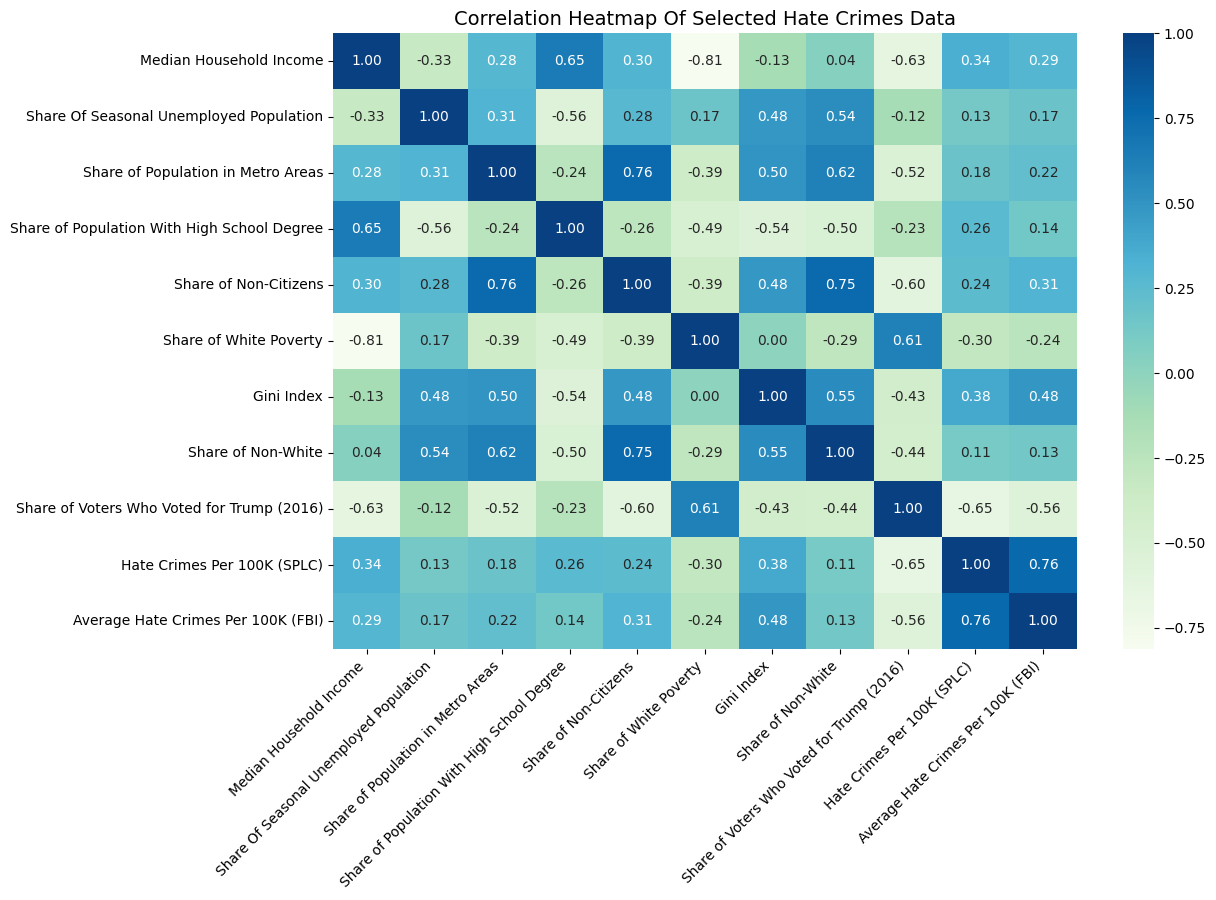

In [45]:
#generate a correlation heatmap for the numeric columns in this dataset

#this defines the columsn which will be modeled in this heatmap
subset_columns = [
    "Median Household Income",
    "Share Of Seasonal Unemployed Population",
    "Share of Population in Metro Areas",
    "Share of Population With High School Degree",
    "Share of Non-Citizens",
    "Share of White Poverty",
    "Gini Index",
    "Share of Non-White",
    "Share of Voters Who Voted for Trump (2016)",
    "Hate Crimes Per 100K (SPLC)",
    "Average Hate Crimes Per 100K (FBI)"
]

#drop null values which would be blank in the heatmap
numeric_data = hate_crimes[subset_columns].dropna()

#create correlation matrix for the data
correlation_matrix = numeric_data.corr()

#generate the heatmap from the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="GnBu",
            cbar=True)
plt.title("Correlation Heatmap Of Selected Hate Crimes Data", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

#add the heatmap image to a widget for the heatmap
heatmap_file = "correlation_heatmap.png"
plt.savefig(heatmap_file, bbox_inches="tight")
plt.close()
correlation_heatmap_widget = pn.pane.Image(heatmap_file, width=800)
correlation_heatmap_widget

Row
    [0] Spacer(width=200)
    [1] Column(width=700)
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Markdown(str)
            [1] Column
                [0] Markdown(str)
            [2] Column
                [0] Markdown(str)
            [3] Column
                [0] Markdown(str)
            [4] Column
                [0] Markdown(str)
            [5] Column
                [0] Markdown(str)
            [6] Image(str, width=800)
    [2] Column
        [0] Markdown(str)
    [3] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
        [2] Column
            [0] Markdown(str)
        [3] Column
            [0] Markdown(str)
        [4] Column
            [0] Markdown(str)
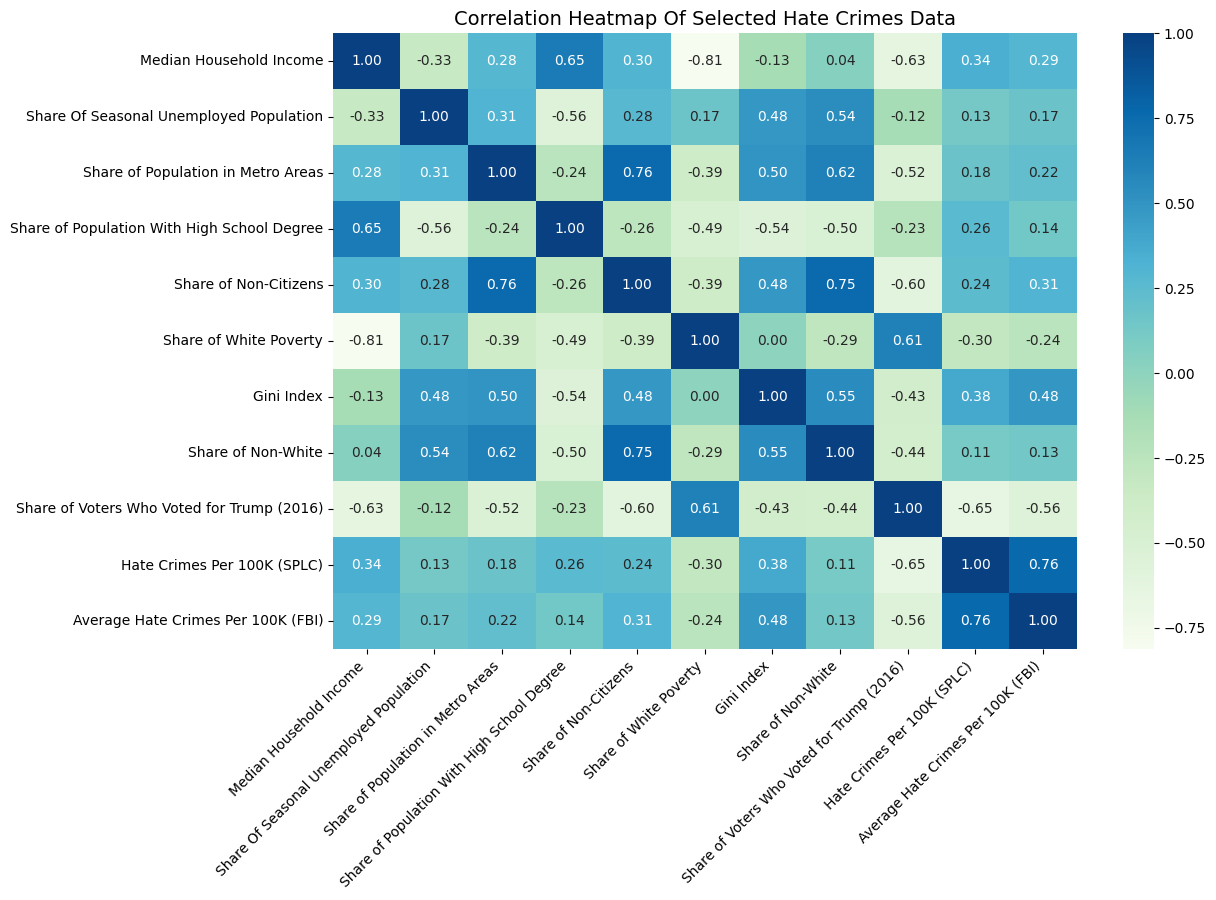

In [57]:
#caption for the home page
heatmap_caption = """## Welcome!

## The dataset analyzed in this dashboard is the Hate Crimes dataset from fivethirtyeight. This dataset divides information by state, providing average values related to income, education levels, racial demographics, “average” measure of inequality, and overall hate crime statistics from the post-2016 election era.

## The purpose of this dataset was to map the correlation between different types of inequality and the prevalence of race-related hate crimes, which were exacerbated by the political climate after the 2016 presidential election.

## We will be observing how closely income and education levels, along with overall background are tied to the rate of hate crimes, highlighting how societal and economic backgrounds can influence these patterns.

## The table here describes the significance of each data column available in this dataset. The correlation heatmap below gives a high-level overview of correlation between different data columns in this dataset."""

#dataframe (table) of the data values and their importance in the overall dashboard
column_descriptions = pd.DataFrame({
    "Columns": [
        "State",
        "Median Household Income",
        "Share Of Seasonal Unemployed Population",
        "Share of Population in Metro Areas",
        "Share of Population With High School Degree",
        "Share of Non-Citizens",
        "Share of White Poverty",
        "Gini Index",
        "Share of Non-White",
        "Share of Voters Who Voted for Trump (2016)",
        "Hate Crimes Per 100K (SPLC)",
        "Average Hate Crimes Per 100K (FBI)"
    ],
    "Significance": [
        "State name",
        "Median household income, 2016",
        "Share of the population that is unemployed (seasonally adjusted), Sept. 2016",
        "Share of the population that lives in metropolitan areas, 2015",
        "Share of adults 25 and older with a high-school degree, 2009",
        "Share of the population that are not U.S. citizens, 2015",
        "Share of white residents who are living in poverty, 2015",
        "Statistical measure of inequality, 2015",
        "Share of the population that is not white, 2015",
        "Share of 2016 U.S. presidential voters who voted for Donald Trump",
        "Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016",
        "Average annual hate crimes per 100,000 population, FBI, 2010-2015"
    ]
})

#widget to hold the home page text
caption_widget = pn.pane.Markdown(heatmap_caption)

#puts the home page text, the data explanation table, and the correlation heatmap together
description_widget = pn.Row(
    pn.Spacer(width=200),
    pn.Column(caption_widget, pn.Row(pn.Column(""), pn.Column(""), pn.Column(""), pn.Column(""), pn.Column(""), pn.Column(""), correlation_heatmap_widget), width=700), pn.Column(""),
    pn.Column("### Column Descriptions",
    column_descriptions, pn.Column(""), pn.Column(""), pn.Column(""))
)

description_widget

Column
    [0] Row
        [0] Select(name='Colormap', options=['GnBu', 'YlGn', ...], value='GnBu')
        [1] Column
            [0] Row
                [0] Markdown(str)
            [1] Row
                [0] Markdown(str)
            [2] Toggle(name='Show Annotations', value=True)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
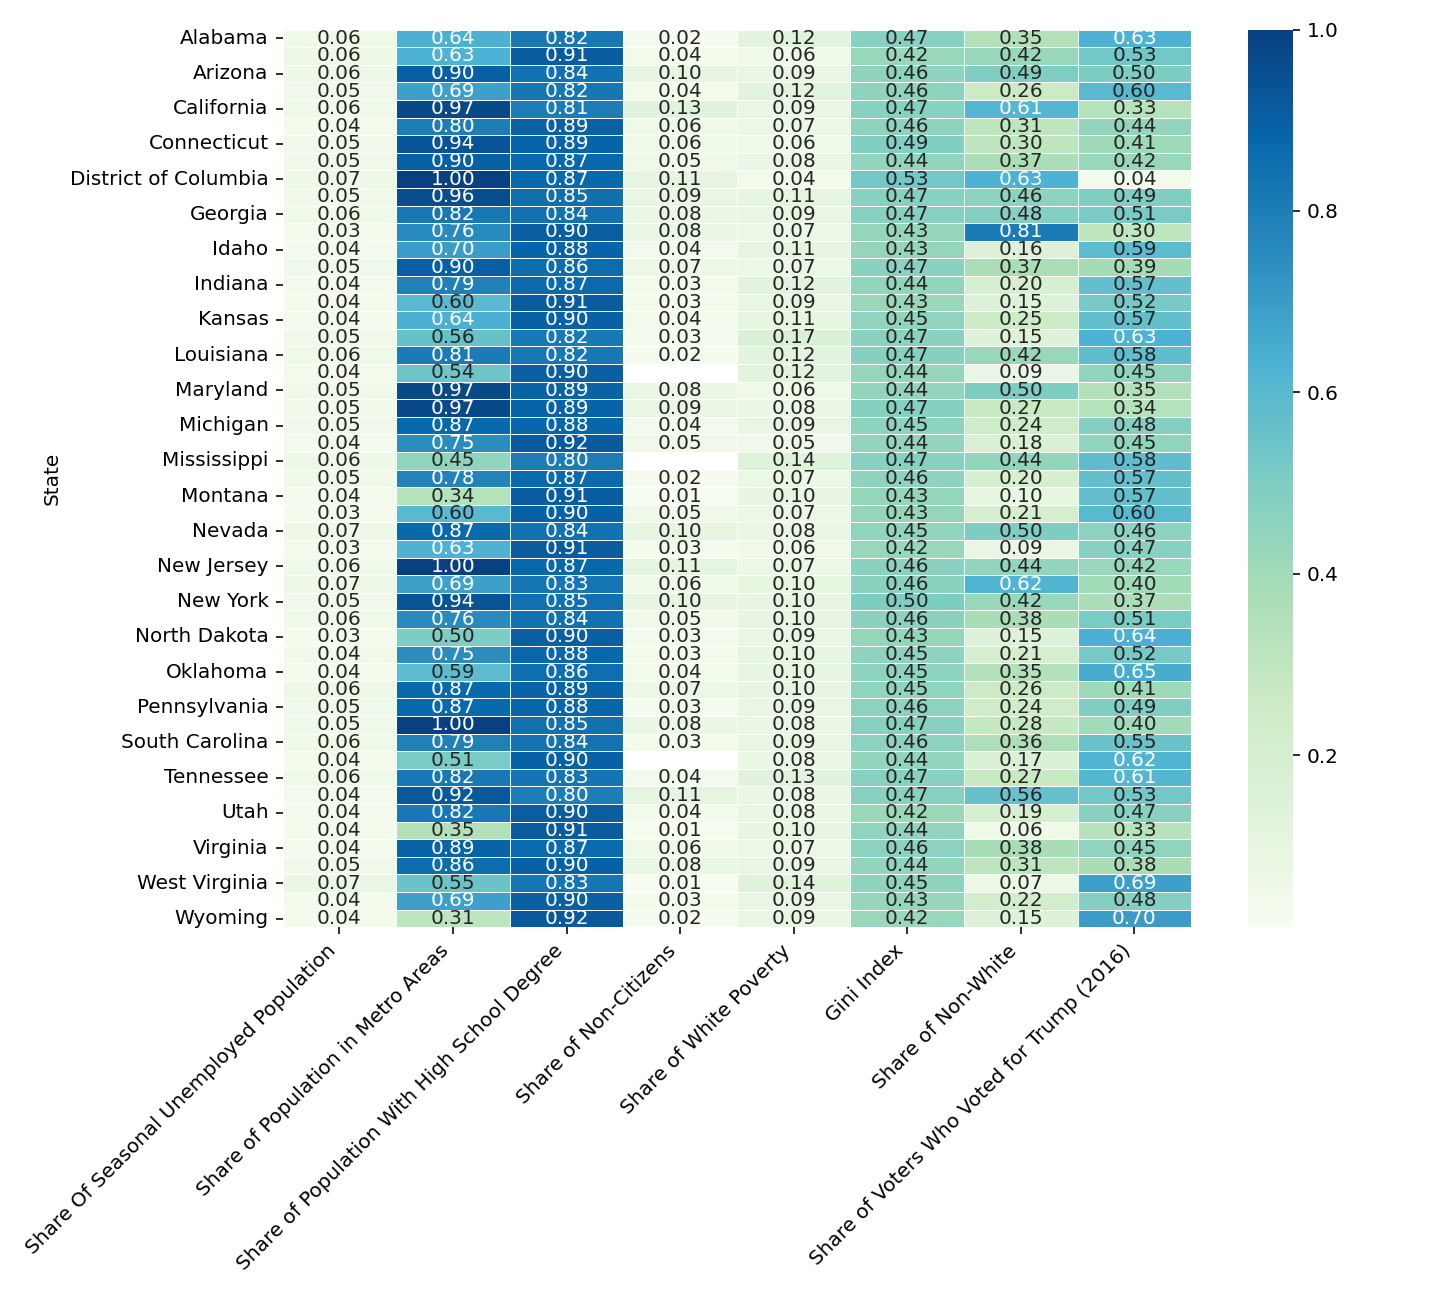

In [47]:
import pandas as pd
import panel as pn
import panel.widgets as pnw
import seaborn as sns
import matplotlib.pyplot as plt

pn.extension()

#selector and annotation toggles for heatmap
cmap_selector = pnw.Select(options=['GnBu', 'YlGn', 'coolwarm', 'viridis'], name='Colormap')
annot_toggle = pnw.Toggle(name='Show Annotations', value=True)

#takes values from the toggles and generates heatmap of numeric columns by state
def plot_heatmap(cmap, annot, width, height):
    fig, ax = plt.subplots(figsize=(10, 9))
    sns.heatmap(
        hate_crimes.set_index('State').drop(columns=['Median Household Income',
                              'Hate Crimes Per 100K (SPLC)',
                              'Average Hate Crimes Per 100K (FBI)']),
        annot=annot,
        fmt=".2f",
        cmap=cmap,
        cbar=True,
        linewidths=0.5,
        ax=ax
    )
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    fig.canvas.draw_idle()
    plt.close(fig)
    return fig

#heatmap generation
heatmap = pn.bind(
    plot_heatmap,
    cmap=cmap_selector,
    annot=annot_toggle.param.value,
    width=10,
    height=6
)

#widget containing the color selector, annotation toggle, and heatmap
heatmap_widget = pn.Column(
    pn.Row(cmap_selector, pn.Column(pn.Row(""), pn.Row(""), annot_toggle)),
    heatmap
)

heatmap_widget

In [79]:
#x and y axis selectors to pick columns for scatterplots
x_axis = pnw.Select(options=list(hate_crimes.columns.drop('State')), name='Select X-Axis Values')
y_axis = pnw.Select(options=list(hate_crimes.columns.drop('State')), name='Select Y-Axis Values')

#transparency slider and color picker to further personalize visualizations
float_slider = pnw.EditableFloatSlider(name='Transparency', fixed_start=0, fixed_end=1, step=0.1, value=1)
color_picker = pnw.ColorPicker(name='Pick Plot Color', value='#1f77b4')
size_slider = pnw.EditableFloatSlider(name='Marker Size', fixed_start=10, fixed_end=25, step=1, value=10)

#text input to pick data that shows when hovering over the plot
hover_data = pnw.MultiChoice(
    name='Hover Data',
    options=list(hate_crimes.columns),
    value=["State"])

#function that takes inputs from the toggles + selectors and generates a scatterplot
def plot_scatter(hate_crimes, x, y, opacity, hover_data, size, width=1800, height=800, color='#1f77b4'):
    if not x or not y:
        return pn.pane.Markdown("### Please select both X-Axis and Y-Axis values to display the scatterplot.")

    title = f"Interactive Scatterplot of {x} vs {y}"
    fig = px.scatter(
        hate_crimes,
        x=x,
        y=y,
        hover_data=hover_data,
        opacity=opacity,
        width=width,
        height=height,
        title=title,
        color_discrete_sequence=[color]
    )
    fig.update_traces(marker_size=size)
    return fig

#scatter plot generated from the function
scatter_plot = pn.bind(
    plot_scatter,
    hate_crimes=hate_crimes,
    x=x_axis,
    y=y_axis,
    opacity=float_slider,
    size = size_slider,
    hover_data=hover_data,
    color=color_picker.param.value
)

#plot centered on the screen
scatter_plot_centered = pn.Row(
    pn.Spacer(width=50),
    scatter_plot,
    pn.Spacer(width=50),
    sizing_mode="stretch_width"
)

#scatter plot caption
scatter_caption = '''Scatter plots can be used to visualize correlational relationships between different columns of numeric data. In this component, you can select the data which will be represented on the x and y axes. This can help you visualize different subtle relationships that are not directly visible in other charts in the dashboard. For example, in the categorical charts, you can visualize each component's data by state. However, in this chart, you can map the relationship between income and education, or population with high school degrees and income. You can increase the complexity of the chart by selecting different columsn as hover data for the points. Finally, you can personalize the chart by changing the plot color, transparency, and the size of the markers.'''
caption = pn.pane.Markdown(f"<div style='margin-top: 20px; font-size: 14px; font-weight: bold;'>{scatter_caption}</div>", sizing_mode="stretch_width")

#panel object to align the option selector
scatter_options = pn.Row(x_axis, y_axis, color_picker, pn.Column(""), hover_data, pn.Column(pn.Row(""), float_slider, pn.Row(""), size_slider))

#the widget for scatterplot which contains both the options and centered plot
scatter_widget = pn.Column(caption,
    pn.Row(""),
    scatter_options,
    scatter_plot_centered,
)

scatter_widget

Column
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row
        [0] Markdown(str)
    [2] Row
        [0] Select(options=['Median Household Income'...], value='Median Household Income')
        [1] Select(options=['Median Household Income'...], value='Median Household Income')
        [2] ColorPicker(name='Pick Plot Color', value='#1f77b4')
        [3] Column
            [0] Markdown(str)
        [4] MultiChoice(name='Hover Data', options=['State', 'Median Househol...], value=['State'])
        [5] Column
            [0] Row
                [0] Markdown(str)
            [1] EditableFloatSlider(fixed_end=1, fixed_start=0, name='Transparency', value=1, width=300)
            [2] Row
                [0] Markdown(str)
            [3] EditableFloatSlider(end=25, fixed_end=25, fixed_start=10, name='Marker Size', start=10, step=1, value=10, width=300)
    [3] Row(sizing_mode='stretch_width')
        [0] Spacer(width=50)
        [1] ParamFunction(function, _pane=Plotly, defer_load=False)
        [2] Spacer(width=50)

In [80]:
#selector that picks columns for the y axis of categorical plots
y_axis = pnw.Select(options=[col for col in hate_crimes.columns if col != 'State'], name='Select Data for Categorical Plot')

#toggle to pick either bar or strip plot for the categorical plots
plot_type = pnw.RadioButtonGroup(options={
    "Bar Plot": px.bar,
    "Strip Plot": px.strip})

#slider to set the transparency of chart
cat_float_slider = pnw.EditableFloatSlider(name='Transparency', fixed_start=0, fixed_end=1, step=0.1, value=1)

#color picker to set the color of the plot
color_picker = pnw.ColorPicker(name='Pick Plot Color', value='#1f77b4')

#text input to pick columns to display when hovering over data
hover_data = pnw.MultiChoice(
    name='Hover Data',
    options=list(hate_crimes.columns),
    value=["State"])

#categorical plot that generates either a bar or strip plot based on the values picked from the selectors and toggles
def categorical_plot(y_axis, plot_type, color, transparency, hover_data):
    if plot_type == px.bar:
        fig = plot_type(
            hate_crimes,
            x='State',
            y=y_axis,
            width = 1800,
            height = 700,
            color_discrete_sequence=[color],  # Color for bar plot
            opacity=transparency,
            title=f'Bar Plot of {y_axis} by State',
            hover_data = hover_data
        )
    elif plot_type == px.strip:
        fig = plot_type(
            hate_crimes,
            x='State',
            y=y_axis,
            width = 1800,
            height = 700,
            title=f'Strip Plot of {y_axis} by State',
            hover_data = hover_data
        )
        fig.update_traces(marker=dict(color=color, opacity=transparency))  # Set marker color for strip plot

    return fig

#generate categorical plot from the function using the values selected by the user
categorical_plot = pn.bind(categorical_plot, y_axis=y_axis, plot_type=plot_type, color=color_picker.param.value, transparency=cat_float_slider, hover_data=hover_data)
#caption to describe the categorical plots and their function
cat_caption = 'Categorical plots can be used to visualize different metrics from the hate crimes data by state. The two options for categorical plots are Bar Plots and Strip Plots. Bar plots can visualize the data by state with bars. Strip plots can visualize the data by state with points. In order to visualize different metrics by state, use the dropdown menu at the top to pick a data point. To further personalize the graph, you can select a transparency and plot color which best displays the information. Finally, in order to see more of the data for each state, select the data you want to see from the Hover Data selector. When you hover over the bars/points in the chart, all your selected data will be visible.'

#pane to hold and style the caption
caption = pn.pane.Markdown(f"<div style='margin-top: 20px; font-size: 14px; font-weight: bold;'>{cat_caption}</div>", sizing_mode="stretch_width")
#center the plot on the screen
categorical_plot_centered = pn.Row(
    pn.layout.Spacer(width=50),
    categorical_plot,
    pn.layout.Spacer(width=50),
    sizing_mode="stretch_width"
)

#panel object to store all the option selectors + components
categorical_options = pn.Row(y_axis, pn.Column("", "", plot_type), pn.Column(pn.Row(""), cat_float_slider), color_picker, pn.Column(""), hover_data)
#widget containing all the categorical plot options and the plot
categorical_plot_widget = pn.Column(caption, pn.Row(""), categorical_options, categorical_plot_centered, sizing_mode="stretch_width")

categorical_plot_widget

Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row
        [0] Markdown(str)
    [2] Row
        [0] Select(options=['Median Household Income'...], value='Median Household Income')
        [1] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] RadioButtonGroup(options={'Bar Plot': <function bar...}, value=<function bar a...)
        [2] Column
            [0] Row
                [0] Markdown(str)
            [1] EditableFloatSlider(fixed_end=1, fixed_start=0, name='Transparency', value=1, width=300)
        [3] ColorPicker(name='Pick Plot Color', value='#1f77b4')
        [4] Column
            [0] Markdown(str)
        [5] MultiChoice(name='Hover Data', options=['State', 'Median Househol...], value=['State'])
    [3] Row(sizing_mode='stretch_width')
        [0] Spacer(width=50)
        [1] ParamFunction(function, _pane=Plotly, defer_load=False)
        [2] Spacer(width=50)

In [81]:
#selector component to pick the data to visualize with box plot
box_value = pnw.Select(options=[col for col in hate_crimes.columns if col != 'State'], name='Select Data for Box Plot')

#toggle which allows you to demonstrate if/which points to show on the boxplot
points_type = pnw.RadioButtonGroup(
    options={
    "Show All Points": 'all',
    "Show Outliers": 'outliers',
    'Show No Points': False}, name='Select Points Setting')

#slider to set the transparency of the boxplot
box_float_slider = pnw.EditableFloatSlider(name='Transparency', fixed_start=0, fixed_end=1, step=0.1, value=1)

#component to set color of the plot
color_picker = pnw.ColorPicker(name='Pick Plot Color', value='#1f77b4')

#input component to set the hover data for the box plot points
hover_data = pnw.MultiChoice(
    name='Hover Data',
    options=list(hate_crimes.columns),
    value=["State"])

#function to generate a box plot based on selected values
def box_plot(box_value, color, points_type, transparency, hover_data):
  fig = px.box(
      hate_crimes,
      x = box_value,
      points=points_type,
      hover_data=hover_data,
      width = 1800,
      height = 600,
      title=f'Box Plot of {box_value} (All State Values)'
  )
  fig.update_traces(marker=dict(color=color, opacity=transparency), opacity=transparency)
  return fig

#generate the box plot using the values from the option components
box_plot = pn.bind(box_plot, box_value=box_value, color=color_picker.param.value, points_type=points_type, transparency=box_float_slider, hover_data=hover_data)

#caption to describe the functionality of the box plot feature in the dashboard
box_caption = 'Box plots can be used to visualize the key distribution metrics of each data category. Specifically, box plots show the minimum value, quartile 1, median, quartile 3, and maximum value. The data to visualize can be picked from the dropdown at the top. Then, you can pick to show all the data points below the box plot, show only outlier points, or show no points. These options can help you better visualize the distribution and density of data. If you choose to include points, you can also select hover data to display when you hover over the points. Finally, you can use the color picker and transparency slider to personalize the chart based on your preferences.'
box_caption = pn.pane.Markdown(f"<div style='margin-top: 20px; font-size: 14px; font-weight: bold;'>{box_caption}</div>", sizing_mode="stretch_width")
#center the box plot
box_plot_centered = pn.Row(
    pn.layout.Spacer(width=50),
    box_plot,
    pn.layout.Spacer(width=50),
    sizing_mode="stretch_width"
)

#panel object that puts all the option components together
box_plot_options = pn.Row(box_value, pn.Column("", "", points_type), pn.Column("", box_float_slider), color_picker, pn.Column(""), hover_data)
#panel widget putting together the box options and the centered plot
box_plot_widget = pn.Column(caption, pn.Row(""), box_plot_options, box_plot_centered)
box_plot_widget

Column
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row
        [0] Markdown(str)
    [2] Row
        [0] Select(options=['Median Household Income'...], value='Median Household Income')
        [1] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] RadioButtonGroup(name='Select Points Setting', options={'Show All Points': 'all',...}, value='all')
        [2] Column
            [0] Markdown(str)
            [1] EditableFloatSlider(fixed_end=1, fixed_start=0, name='Transparency', value=1, width=300)
        [3] ColorPicker(name='Pick Plot Color', value='#1f77b4')
        [4] Column
            [0] Markdown(str)
        [5] MultiChoice(name='Hover Data', options=['State', 'Median Househol...], value=['State'])
    [3] Row(sizing_mode='stretch_width')
        [0] Spacer(width=50)
        [1] ParamFunction(function, _pane=Plotly, defer_load=False)
        [2] Spacer(width=50)

In [82]:
import folium
import pandas as pd
import polars as pl
import json

#toggle button which selects the data to be used for the map plot
plot_type = pnw.RadioButtonGroup(options={
    "View SPLC Data": 's',
    "View FBI Data": 'f'})

#function to generate a map plot (either SPLC or FBI data) of the United States
def map_plots(plot_type):
  us_shapes = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
  map = folium.Map(location=[37.8, -96], zoom_start=4, min_zoom = 4, max_zoom = 6, width='100%', height='80%')
  if plot_type == 's':
    choropleth = folium.Choropleth(
      geo_data=us_shapes,
      name='choropleth',
      data=hate_crimes,
      columns=['State', 'Hate Crimes Per 100K (SPLC)'],
      key_on='feature.properties.name',
      fill_color='Reds',
      fill_opacity=0.7,
      line_opacity=0.3,
      legend_name='Hate Crimes per 100k -- Southern Poverty Law Center'
    ).add_to(map)
  elif plot_type == 'f':
    choropleth = folium.Choropleth(
      geo_data=us_shapes,
      name='choropleth',
      data=hate_crimes,
      columns=['State', 'Average Hate Crimes Per 100K (FBI)'],
      key_on='feature.properties.name',
      fill_color='Greens',
      fill_opacity=1,
      line_opacity=0.5,
      legend_name='Average Hate Crimes per 100k -- FBI'
    ).add_to(map)

  style_function = "font-size: 15px; font-weight: bold"
  choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],style=style_function, labels=False)
  )

  return map

#generate a map plot based on the map plots function and the data selected
map_plot = pn.bind(map_plots, plot_type=plot_type)
#center the map plot on the screen
map_plot_centered = pn.Row(
    pn.layout.Spacer(width=50),
    pn.pane.plot.Folium(map_plot, height=1000, width=1800),
    pn.layout.Spacer(width=50),
    sizing_mode="stretch_width"
)

#caption to describe the functionality and significance of the map plots
map_caption = '### The following maps display the hate crime rates by state across the nation. There are two sources of hate crime data -- the Southern Poverty Law Center and the FBI. The Southern Poverty Law Center (SPLC) is an independent, non-profit organization focused on civil rights litigation. The SPLC reports both hate crimes and non-prosecutable hate incidents in this report. The SPLC also compiles its own data from research into state records. The FBI is the government organization to which prosecutable hate incidents are reported. FBI data is the result of voluntary submissions from the states. In this chart, we mapped data from both sources separately to see how the biases and different methods of data collection influence the overall picture of hate crimes by state. From the maps, we can see that some data is missing. Furthermore, we can see that SPLC data shows increased hate crimes in the northern states. The FBI data shows that a majority of states tend to have lower rates of hate crimes -- between 0-6/100K for almost all states.'
#widget putting together the toggle, caption, and map plot
map_plot_widget = pn.Column(plot_type, map_caption, map_plot_centered)
map_plot_widget

Column
    [0] RadioButtonGroup(options={'View SPLC Data': 's', ...}, value='s')
    [1] Markdown(str)
    [2] Row(sizing_mode='stretch_width')
        [0] Spacer(width=50)
        [1] Folium(Map, height=1000, sizing_mode='fixed', width=1800)
        [2] Spacer(width=50)

Row
    [0] Column
        [0] Markdown(str)
        [1] Tabs
            [0] Column(name='Data Overview')
                [0] Row
                    [0] Markdown(str)
                [1] Row
                    [0] Spacer(width=200)
                    [1] Column(width=700)
                        [0] Markdown(str)
                        [1] Row
                            [0] Column
                                [0] Markdown(str)
                            [1] Column
                                [0] Markdown(str)
                            [2] Column
                                [0] Markdown(str)
                            [3] Column
                                [0] Markdown(str)
                            [4] Column
                                [0] Markdown(str)
                            [5] Column
                                [0] Markdown(str)
                            [6] Image(str, width=800)
                    [2] Column
                        [0] Markdown(str)
                    [3] Column
                        [0] Markdown(str)
                        [1] DataFrame(DataFrame)
                        [2] Column
                            [0] Markdown(str)
                        [3] Column
                            [0] Markdown(str)
                        [4] Column
                            [0] Markdown(str)
            [1] Column(name='Categorical Plots')
                [0] Row
                    [0] Markdown(str)
                [1] Column(sizing_mode='stretch_width')
                    [0] Markdown(str, sizing_mode='stretch_width')
                    [1] Row
                        [0] Markdown(str)
                    [2] Row
                        [0] Select(options=['Median Household Income'...], value='Median Household Income')
                        [1] Column
                            [0] Markdown(str)
                            [1] Markdown(str)
                            [2] RadioButtonGroup(options={'Bar Plot': <function bar...}, value=<function bar a...)
                        [2] Column
                            [0] Row
                                [0] Markdown(str)
                            [1] EditableFloatSlider(fixed_end=1, fixed_start=0, name='Transparency', value=1, width=300)
                        [3] ColorPicker(name='Pick Plot Color', value='#1f77b4')
                        [4] Column
                            [0] Markdown(str)
                        [5] MultiChoice(name='Hover Data', options=['State', 'Median Househol...], value=['State'])
                    [3] Row(sizing_mode='stretch_width')
                        [0] Spacer(width=50)
                        [1] ParamFunction(function, _pane=Plotly, defer_load=False)
                        [2] Spacer(width=50)
            [2] Column(name='Box Plot')
                [0] Row
                    [0] Markdown(str)
                [1] Column
                    [0] Markdown(str, sizing_mode='stretch_width')
                    [1] Row
                        [0] Markdown(str)
                    [2] Row
                        [0] Select(options=['Median Household Income'...], value='Median Household Income')
                        [1] Column
                            [0] Markdown(str)
                            [1] Markdown(str)
                            [2] RadioButtonGroup(name='Select Points Setting', options={'Show All Points': 'all',...}, value='all')
                        [2] Column
                            [0] Markdown(str)
                            [1] EditableFloatSlider(fixed_end=1, fixed_start=0, name='Transparency', value=1, width=300)
                        [3] ColorPicker(name='Pick Plot Color', value='#1f77b4')
                        [4] Column
                            [0] Markdown(str)
                        [5] MultiChoice(name='Hover Data', options=['State', 'Median Househol...], value=['State'])
                    [3] Row(sizing_mode='stretch_
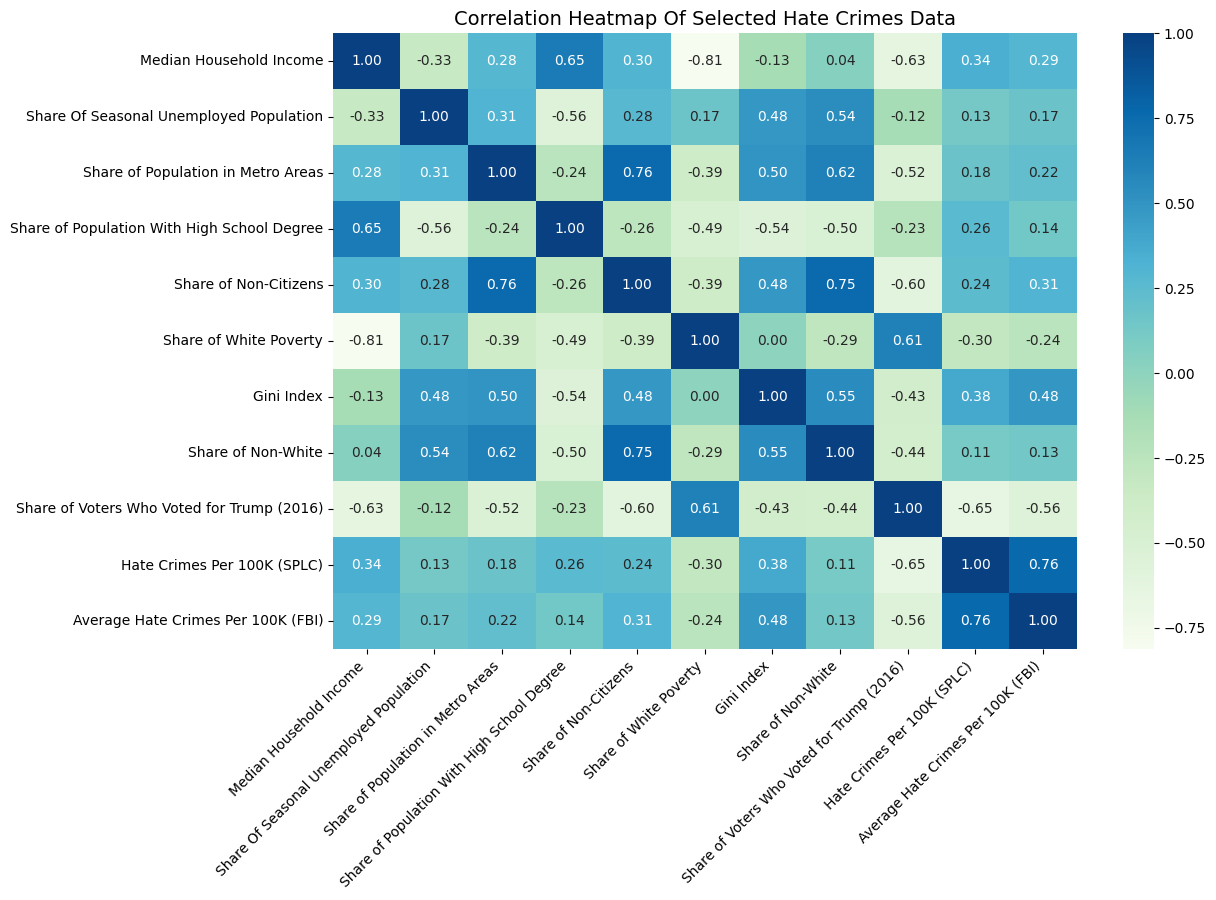
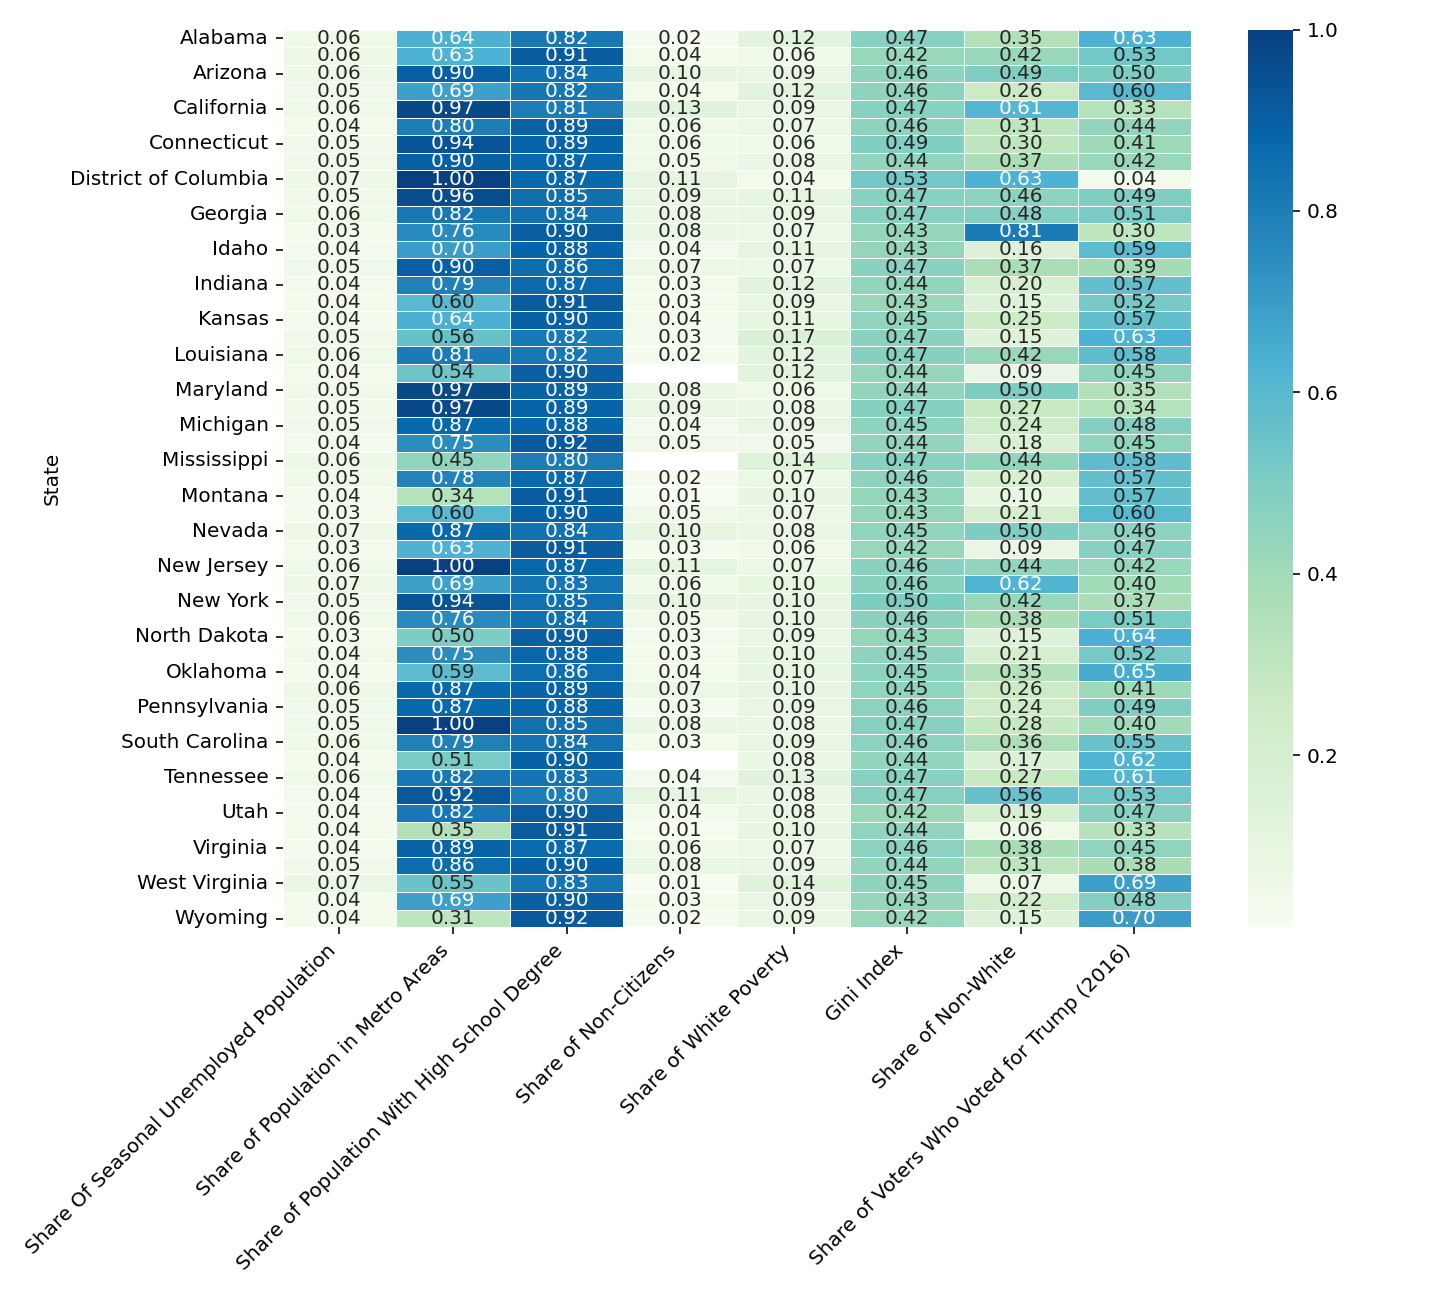

In [83]:
#compiling the dashboard using a tab layout for each interactive plot component

#data tab -- home page -- describes the purpose of the dashboard and the information in the dataset
data_tab = pn.Column(pn.Row(""), description_widget, name='Data Overview')
#cat tab -- displays the categorical plot component with caption
cat_tab = pn.Column(pn.Row(""), categorical_plot_widget, name='Categorical Plots')
#box tab -- displays the box plot component with caption
box_tab = pn.Column(pn.Row(""), box_plot_widget, name='Box Plot')
#scatter tab -- displays the box plot component with caption
scatter_tab = pn.Column(pn.Row(""), scatter_widget, name='Scatter Plot')
#map tab -- displays the map plot component with caption
map_tab = pn.Column(pn.Row(""), map_plot_widget, name='Map Plots')
#heatmap tab -- displays the heatmap component with caption
heatmap_tab = pn.Column(pn.Row(""), heatmap_widget, name='Heatmap')

#all the tabs are put together and will be displayed at the top of the dashboard
tabs = pn.Tabs(data_tab, cat_tab, box_tab, scatter_tab, map_tab, heatmap_tab)

#the whole dashboard is put together with a title + the tabs
full_dashboard = pn.Row(pn.Column("# Visualizing National Hate Crime Data (Post 2016 Election)", tabs))
full_dashboard